# Python example

## How to load the model

In [1]:
import swami    # SWAMI library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mcm = swami.SwamiModel()  # defaults to MCM

## Single point

In [3]:
out = mcm.run(
    altitude=100,
    latitude=3,
    longitude=15,
    local_time=12,
    day_of_year=53,
    f107=70,
    f107m=69,
    kp1=1,
    kp2=1,
)
dens = out["MCM"]["dens"]
temp = out["MCM"]["temp"]
print(f"Density is {dens:.3e} g/cm3")
print(f"Temperature is {temp:.2f} K")

Density is 2.603e-10 g/cm3
Temperature is 175.26 K


## Altitude profile

In [4]:
altitudes = np.arange(0.0, 300, 10)
temp = []
dens = []

for h in altitudes:
    out = mcm.run(
        altitude=h,
        latitude=3,
        longitude=15,
        local_time=12,
        day_of_year=53,
        f107=70,
        f107m=69,
        kp1=1,
        kp2=1,
    )
    dens.append(out["MCM"]["dens"])
    temp.append(out["MCM"]["temp"])

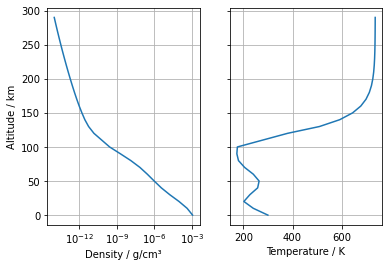

In [5]:
f, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(dens, altitudes)
ax[0].set_xscale("log")
ax[0].set_xlabel("Density / g/cm³")
ax[0].set_ylabel("Altitude / km")

ax[1].plot(temp, altitudes)
ax[1].set_xlabel("Temperature / K")

ax[0].grid(True)
ax[1].grid(True)

## Map at altitude

In [6]:
lati = np.arange(-90, 90, 10)
loct = np.arange(0, 24, 3)

temp = np.zeros((len(lati), len(loct)))
dens = np.zeros((len(lati), len(loct)))

for i, lat in enumerate(lati):
    for j, lt in enumerate(loct):
        out = mcm.run(
            altitude=160,
            latitude=lat,
            longitude=15,
            local_time=lt,
            day_of_year=53,
            f107=70,
            f107m=69,
            kp1=1,
            kp2=1,
        )
        dens[i,j] = out["MCM"]["dens"]
        temp[i,j] = out["MCM"]["temp"]

Text(0.5, 0, 'Local time / h')

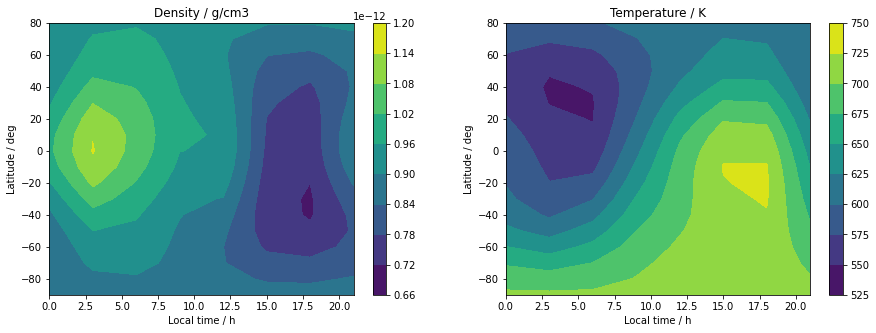

In [7]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

lt, la = np.meshgrid(loct, lati)

c = ax[0].contourf(lt, la, dens)
f.colorbar(c, ax=ax[0])
ax[0].set_title("Density / g/cm3")
ax[0].set_ylabel("Latitude / deg")
ax[0].set_xlabel("Local time / h")

c = ax[1].contourf(lt, la, temp)
f.colorbar(c, ax=ax[1])
ax[1].set_title("Temperature / K")
ax[1].set_ylabel("Latitude / deg")
ax[1].set_xlabel("Local time / h")

    


## DTM

In [8]:
dtm = swami.SwamiModel("DTM2020")

out = dtm.run(
    altitude=200,
    latitude=3,
    longitude=15,
    local_time=12,
    day_of_year=53,
    f107=70,
    f107m=69,
    kp1=1,
    kp2=1,
    get_uncertainty=True
)
dens = out["DTM2020"]["dens"]
dens_unc = out["DTM2020"]["dens_unc"]
temp = out["DTM2020"]["temp"]
print(f"Density is {dens:.3e} g/cm3, with uncertainty {dens_unc:.2} %")
print(f"Temperature is {temp:.2f} K")

Density is 1.827e-13 g/cm3, with uncertainty 7.4 %
Temperature is 726.31 K


## UM

In [9]:
um = swami.SwamiModel("UM")

out = um.run(
    altitude=100,
    latitude=3,
    longitude=15,
    local_time=12,
    day_of_year=53,
    f107=70,
    f107m=69,
    kp1=1,
    kp2=1,
    get_uncertainty=True
)

dens = out["UM"]["dens"]
dens_std = out["UM"]["dens_std"]
temp = out["UM"]["temp"]
temp_std = out["UM"]["temp_std"]

print(f"Density is {dens:.3e} g/cm3, with standard deviation {dens_std:.3e}")
print(f"Temperature is {temp:.2f} K, with standard deviation {temp_std:.2f}")

Density is 2.603e-10 g/cm3, with standard deviation 2.474e-11
Temperature is 175.26 K, with standard deviation 13.59
